In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data_step1 = pd.read_csv("auto1_ds_challenge_step1.csv")
data_step1

,id,manufacturer,main_type,built_year,mileage,new_car_price,first_quote_wkda,wkda_created_on,estimated_price_3rd_party_provider
0,0,Audi,A2,2003,200000.0,40200.0,NaN,2021-01-02 01:57:14.370094,NaN
1,1,Audi,A2,2005,125000.0,40200.0,9700.0,2021-01-10 06:50:00.458635,9792.050684
2,2,Audi,A2,2002,150000.0,40200.0,9000.0,2021-01-14 07:38:37.939529,9077.178799
3,3,Audi,A2,2000,225000.0,40200.0,8100.0,2021-01-06 05:27:29.196997,8126.027452
4,4,Audi,A2,2004,175000.0,40200.0,NaN,2021-01-14 04:26:14.949931,NaN
...,...,...,...,...,...,...,...,...,...
292498,296960,Iveco,Daily,2011,225000.0,40100.0,7700.0,2021-01-03 22:22:06.847898,7732.346550
292499,296961,Iveco,Daily,2013,80000.0,40100.0,NaN,2021-01-06 09:49:33.570211,NaN
292500,296962,Iveco,Daily,2012,100000.0,40100.0,8300.0,2021-01-05 23:31:23.283930,8334.842967
292501,296963,Iveco,Daily,2010,300000.0,40100.0,5900.0,2021-01-13 14:09:47.531264,5996.797899


In [2]:
data_step1.isnull().sum()

id                                        0
manufacturer                              0
main_type                                 0
built_year                                0
mileage                                   0
new_car_price                             0
first_quote_wkda                      68889
wkda_created_on                           0
estimated_price_3rd_party_provider    68889
dtype: int64

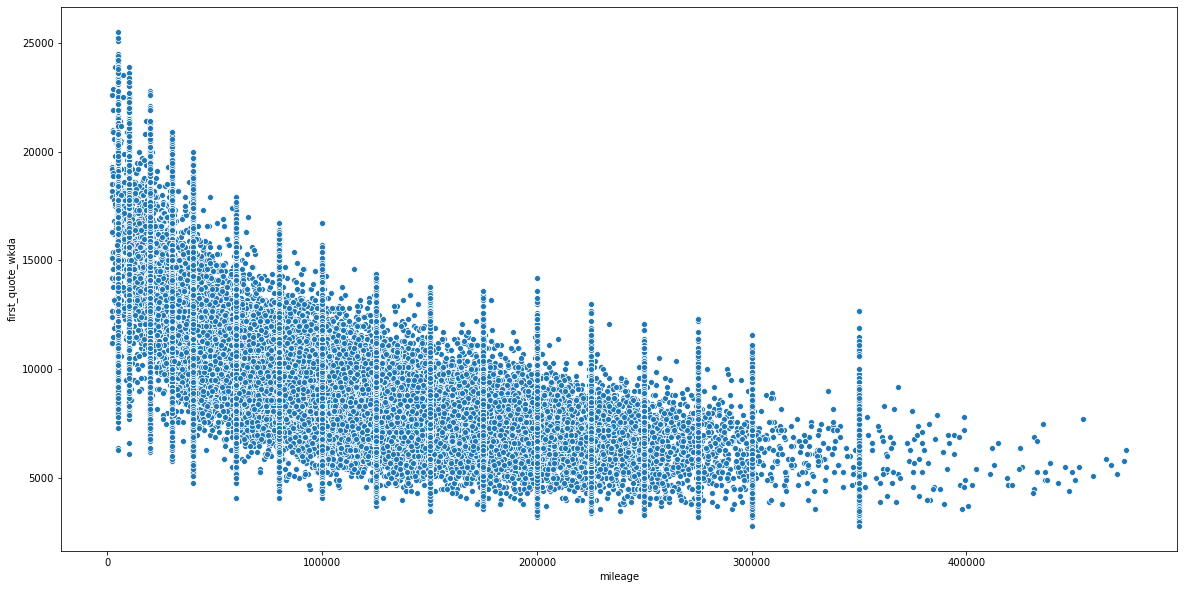

In [3]:
fig, ax = plt.subplots(figsize=(20, 10))
  
sns.scatterplot(data=data_step1, x='mileage', y='first_quote_wkda')
plt.show()


- ### The first quote reduces as the mileage increases

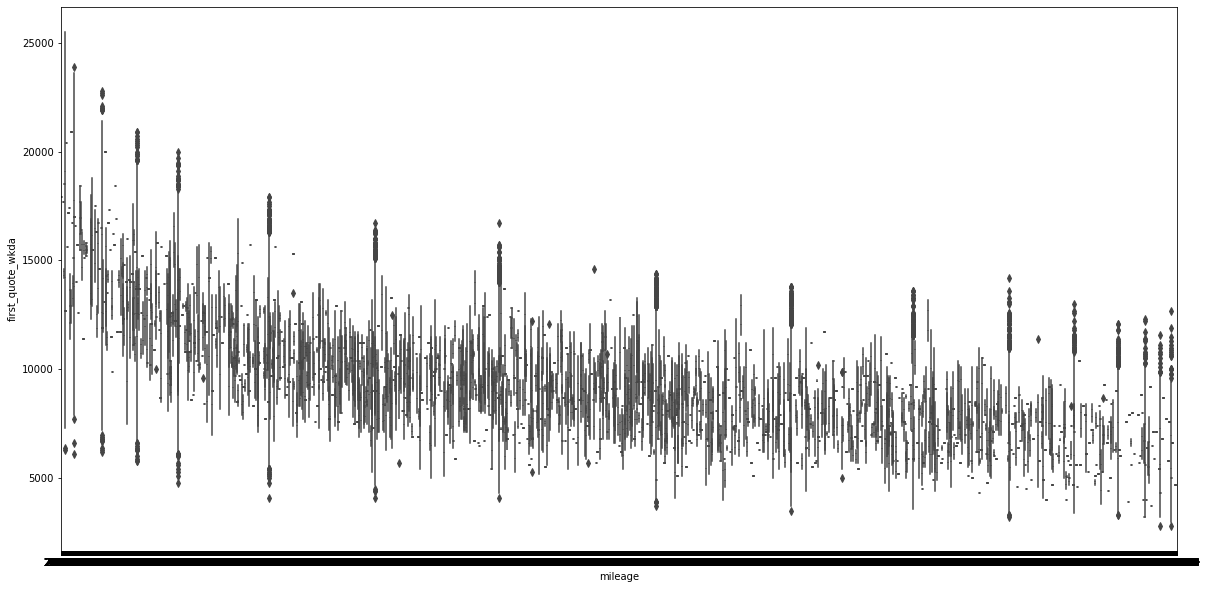

In [4]:
fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.boxplot(x="mileage", y="first_quote_wkda", data=data_step1)

In [5]:
data_step1['built_year'] = 2021 - data_step1['built_year']

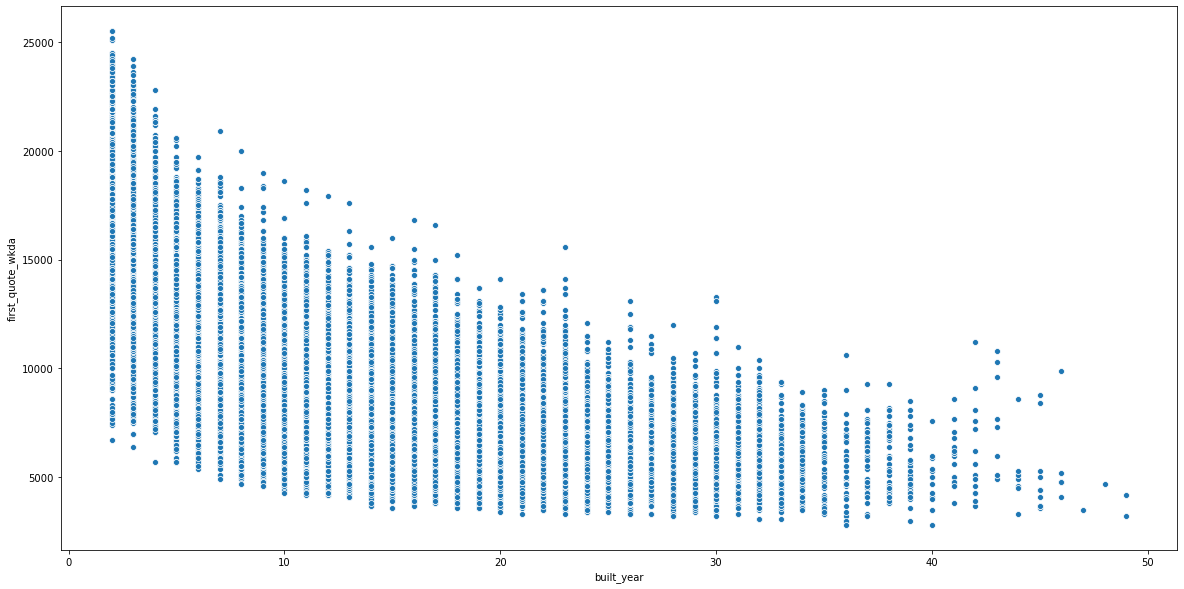

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
  
sns.scatterplot(data=data_step1, x='built_year', y='first_quote_wkda')
plt.show()

- ### The first quote reduces as the duration of built years increases

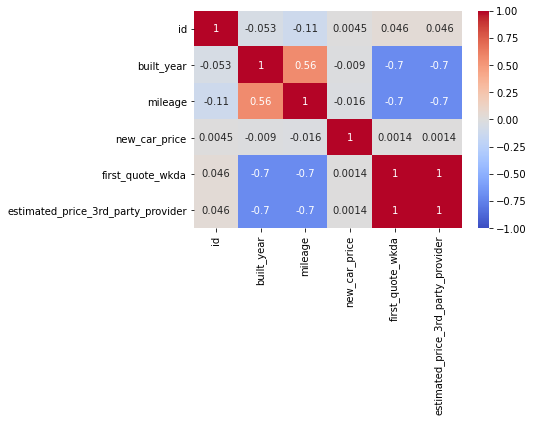

In [7]:
sns.heatmap(data_step1.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

- ### The first quote is highly correlated with the estimated price of 3rd party provider which is expected

# The KPI for the first step would be the measure of the percentage of new customers who login to our website and fill their data so as to generate the first quote on a monthly basis

In [31]:
data_step2 = pd.read_csv("auto1_ds_challenge_step2.csv")
data_step2

,id,damages_self_eval,self_evaluation_completed_datetime,actual_offer,actual_offer_accepted,number_of_owners,air_condition,gearbox,fueltype,GPS
0,2,minor,2021-01-16 08:14:14.498608,8461.0,False,1,automatic,hybrid,electric,False
1,3,minor,2021-01-08 01:31:50.918314,8164.0,True,7,manual,automatic,diesel,False
2,7,moderate,2021-01-12 00:34:25.742023,8150.0,True,1,automatic,manual,diesel,False
3,12,severe,2021-01-11 06:43:58.432895,6066.0,True,4,automatic,automatic,hybrid,False
4,13,minor,2021-01-18 22:59:49.783568,8577.0,True,6,automatic,automatic,petrol,True
...,...,...,...,...,...,...,...,...,...,...
113675,296947,minor,2021-01-10 19:04:51.429191,13032.0,False,7,no_AC,hybrid,hybrid,False
113676,296949,No_damage,2021-01-05 08:25:25.421094,7929.0,True,3,automatic,manual,hybrid,True
113677,296952,minor,2021-01-11 00:39:14.183757,6867.0,True,6,automatic,automatic,diesel,True
113678,296956,moderate,2021-01-08 10:11:31.507722,9594.0,True,6,manual,manual,hybrid,False


In [32]:
data_step2.isnull().sum()

id                                    0
damages_self_eval                     0
self_evaluation_completed_datetime    0
actual_offer                          0
actual_offer_accepted                 0
number_of_owners                      0
air_condition                         0
gearbox                               0
fueltype                              0
GPS                                   0
dtype: int64

In [34]:
data_step2['actual_offer_accepted'].value_counts(normalize = True).mul(100).astype(str) + '%'

True     63.09113300492611%
False    36.90886699507389%
Name: actual_offer_accepted, dtype: object

# The KPI for the second step would be the measure of the percentage of  customers who accept our actual offer. Our data indicates that only 63% of the total customers accept our offer. We would like to increase the percentage to 90% or more.

In [39]:
len(data_step2)/len(data_step1) * 100

38.86455865409928

## Also we might want to increase the number of customers who proceed from step 1 to step 2 by providing a better first quote. Currently, the data shows that approximately 39% of our customers proceed to self-evaluation stage. We might want to increase that percentage.

In [10]:
data_step3 = pd.read_csv("auto1_ds_challenge_step3.csv")
data_step3

,id,sold_price,sold_datetime
0,3,8497.0,2021-01-22 19:13:05.189547
1,7,8387.0,2021-02-04 01:18:59.769822
2,12,NaN,NaN
3,13,8660.0,2021-02-01 10:12:27.783674
4,14,9456.0,2021-01-20 14:12:07.787134
...,...,...,...
71717,296942,7135.0,2021-01-14 15:29:32.819231
71718,296949,NaN,NaN
71719,296952,6949.0,2021-01-28 15:28:11.553920
71720,296956,9852.0,2021-01-22 12:08:56.886953


In [11]:
data_step3.isnull().sum()

id                   0
sold_price       16853
sold_datetime    16853
dtype: int64

# The KPI for the last step would be the measure of the percentage of  customers who accept our actual offer and sell it to Auto1. This would help us increasing our net income as more number of cars being selled to Auto1 would mean more revenue for Auto1